# Zomato Data Analysis Using Python

This project aims to explore and analyze data from the popular restaurant aggregation and food delivery platform, Zomato. The primary goal is to extract meaningful insights about consumer preferences and restaurant trends to address specific inquiries. The analysis will help answer the following questions:

1. **Do a greater number of restaurants provide online delivery as opposed to offline services?**  
   This analysis will shed light on the adoption of online delivery services among restaurants and compare it with offline dining options.

2. **Which types of restaurants are the most favored by the general public?**  
   By examining customer preferences, we aim to identify the most popular types of restaurants based on cuisine, ambiance, or other characteristics.

3. **What price range is preferred by couples for their dinner at restaurants?**  
   Understanding the price range most suitable for couples can provide insights into their dining preferences and budget constraints.

Through Python's powerful data analysis libraries, such as `Pandas`, `NumPy`, and visualization tools like `Matplotlib` and `Seaborn`, this project will provide a comprehensive examination of the Zomato dataset to uncover these patterns and trends. The results will help inform both consumers and restaurant businesses about market dynamics and customer behavior.


## Import necessary Python libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Create the data frame

In [4]:
df = pd.read_csv("Zomato data .csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


## Data Preprocessing: Converting the "rate" Column to Float


In [5]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


## Summarizing the DataFrame


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Checking for Null Values in the DataFrame


In [7]:
null_values = df.isnull().sum()
print(null_values)

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


### There is no NULL value in dataframe.

## Exploring the "listed_in (type)" Column


Text(0.5, 0, 'Type of restaurant')

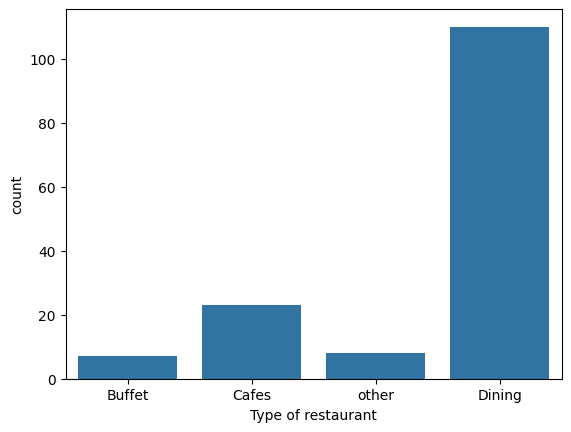

In [8]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel("Type of restaurant")

# <span style="font-size:20px;">***Conclusion: The majority of the restaurants fall into the dining category.***</span>

Text(0, 0.5, 'Votes')

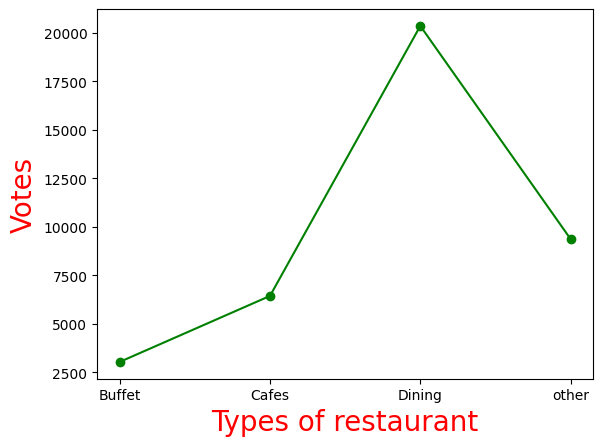

In [10]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Types of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

# <span style="font-size:20px;">***Conclusion: Dining restaurants are preferred by a larger number of individuals.***</span>

### Finding the Restaurant with the Maximum Votes


In [12]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


## Exploring the "online_order" Column

<Axes: xlabel='online_order', ylabel='count'>

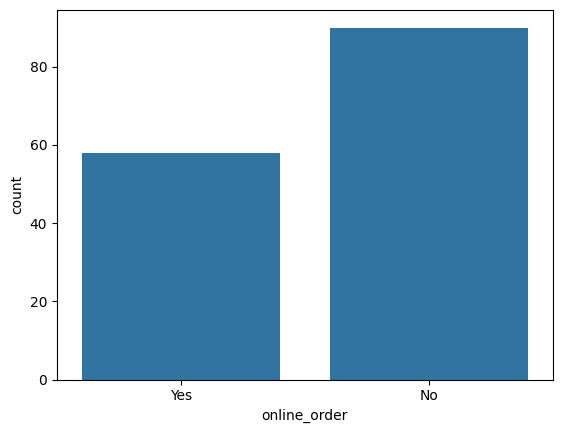

In [16]:
sns.countplot(x=df['online_order'])

# <span style="font-size:20px;">***Conclusion: This suggests that a majority of the restaurants do not accept online orders.***</span>

## Exploring the "rate" Column


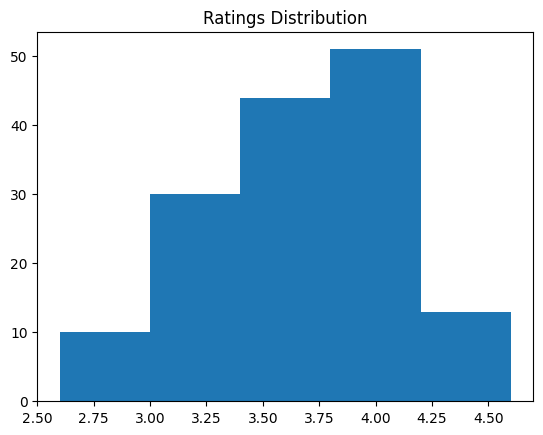

In [17]:
plt.hist(df['rate'], bins=5)
plt.title("Ratings Distribution")
plt.show()

# <span style="font-size:20px;">***Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.***</span>

## Exploring the "approx_cost(for two people)" Column

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

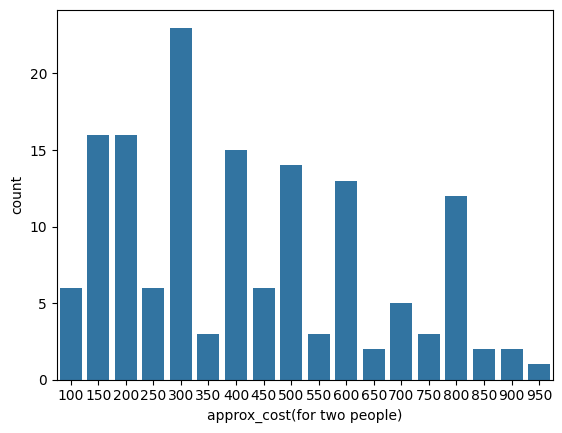

In [19]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

# <span style="font-size:20px;">***Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.***</span>

## Comparing Ratings: Online vs. Offline Orders


<Axes: xlabel='online_order', ylabel='rate'>

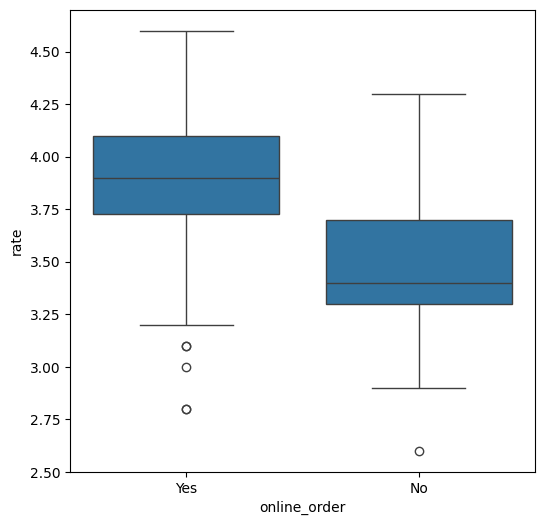

In [20]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

# <span style="font-size:20px;">***Conclusion: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.***</span>

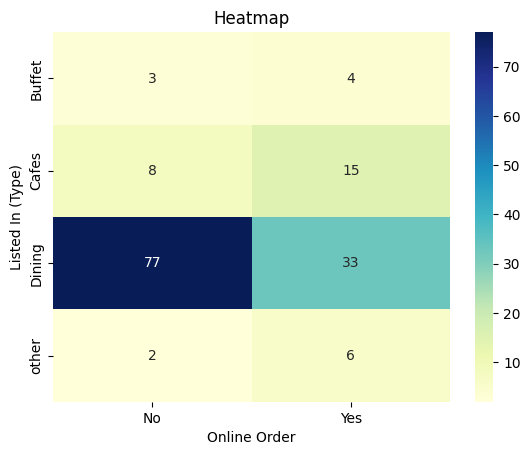

In [21]:
pivot_table = df.pivot_table(index='listed_in(type)', columns= 'online_order', aggfunc= 'size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap = "YlGnBu", fmt = 'd')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

# <span style="font-size:20px;">***Conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.***</span>

## Conclusion and Recommendations

In this project, we analyzed the Zomato dataset to uncover insights into restaurant preferences, pricing, and ordering trends. Below is a summary of our findings and actionable recommendations:

## Key Findings:
1. **Dining Dominance**: The majority of restaurants fall under the dining category, with dining being the preferred choice for a larger number of individuals.
2. **Online Orders and Ratings**: While a significant number of restaurants do not accept online orders, online orders generally received higher ratings compared to offline orders.
3. **Couples' Preferences**: Couples tend to prefer dining at restaurants with an approximate cost of 300 rupees.
4. **Order Trends by Type**: Dining restaurants primarily operate through offline orders, whereas cafes are more inclined to accept online orders. 
   - This indicates that clients enjoy in-person dining experiences at restaurants but prefer the convenience of online ordering for cafes.

## Recommendations:
1. **Expand Online Order Options**: Restaurants that primarily operate offline should consider integrating online ordering systems to capture a wider audience and leverage the high ratings associated with online orders.
2. **Enhance In-Person Dining Experiences**: Since dining is the preferred choice for many, restaurants should focus on improving ambiance, service quality, and overall dining experiences to retain customer loyalty.
3. **Targeted Promotions for Couples**: Restaurants with an average cost of around 300 rupees should focus marketing campaigns on couples, offering packages or discounts tailored to this audience.
4. **Cafes to Prioritize Online Presence**: Cafes should invest more in online order optimization, such as app-based ordering and timely deliveries, to align with customer preferences.
5. **Improve Offline Ordering Ratings**: Restaurants with offline orders should analyze customer feedback and implement strategies to improve service quality and customer satisfaction.

By implementing these recommendations, businesses in the restaurant industry can better align with customer preferences and emerging market trends, ultimately boosting their competitiveness and profitability.

This project highlights the power of data-driven decision-making in shaping the future of the restaurant business, providing a roadmap for continuous growth and improvement.
